# Extract data

In [1]:
from os.path import isfile, isdir
import zipfile

In [2]:
if not isfile('database.csv'):
    with zipfile.ZipFile('earthquake-database.zip', 'r') as the_zip:
        the_zip.extractall()
        the_zip.close()

# Explore data

Ref: https://www.kaggle.com/futurist/d/usgs/earthquake-database/mapping-of-earthquake-and-its-analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# for installation
# conda install basemap
from mpl_toolkits.basemap import Basemap
import datetime as dt
import seaborn as sns

In [4]:
# load file
try:
    t_file = pd.read_csv('database.csv', encoding='ISO-8859-1')
    print('File load: Success')
except:
    print('File load: Failed')

File load: Success


In [5]:
# view data
t_file.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [6]:
t_file.shape

(23412, 21)

In [7]:
t_file.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [20]:
t_file['Magnitude Type'].value_counts()

MW     7722
MWC    5669
MB     3761
MWB    2458
MWW    1983
MS     1702
ML       77
MWR      26
MD        6
MH        5
Name: Magnitude Type, dtype: int64

In [9]:
earth = t_file[["Date", "Latitude", "Longitude", "Magnitude", "Depth", "Type"]]

In [10]:
earth.head()

,Date,Latitude,Longitude,Magnitude,Depth,Type
0,01/02/1965,19.246,145.616,6.0,131.6,Earthquake
1,01/04/1965,1.863,127.352,5.8,80.0,Earthquake
2,01/05/1965,-20.579,-173.972,6.2,20.0,Earthquake
3,01/08/1965,-59.076,-23.557,5.8,15.0,Earthquake
4,01/09/1965,11.938,126.427,5.8,15.0,Earthquake


In [11]:
earth["Date"] = pd.to_datetime(earth["Date"])

In [12]:
earth.shape

(23412, 6)

In [13]:
earth.pivot_table(index = "Type", values = "Magnitude", aggfunc = len)

Type
Earthquake           23232.0
Explosion                4.0
Nuclear Explosion      175.0
Rock Burst               1.0
Name: Magnitude, dtype: float64

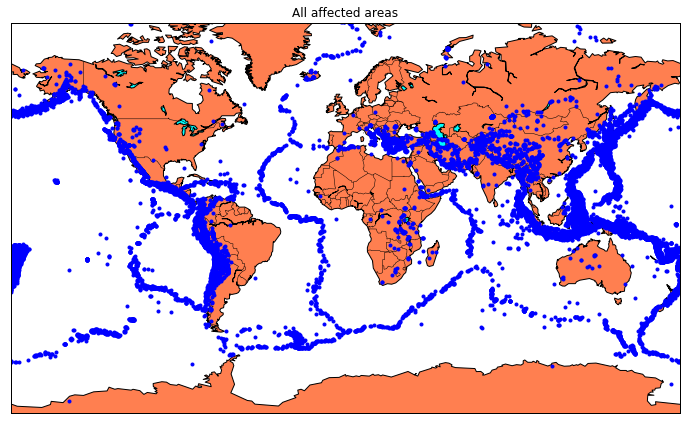

In [15]:
stillm = Basemap(projection='mill', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180, lat_ts=20, resolution='c')
longitudes = earth["Longitude"].tolist()
latitudes = earth["Latitude"].tolist()
x, y = stillm(longitudes, latitudes)

fig = plt.figure(figsize=(12, 10))
plt.title("All affected areas")
stillm.plot(x, y, "o", markersize = 3, color = 'blue')
stillm.drawcoastlines()
stillm.fillcontinents(color='coral', lake_color='aqua')
stillm.drawmapboundary()
stillm.drawcountries()
plt.show()

Magnitude   Number of Occurence
5-6         16058.0
6-7         6616.0
7-8         698.0
8-9         38.0
9-10         2.0


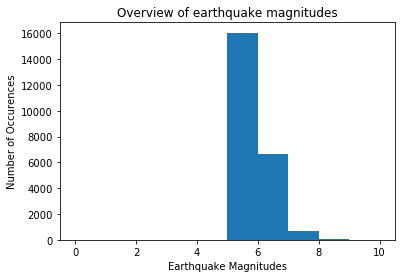

In [19]:
(n, bins, patches) = plt.hist(earth["Magnitude"], range = (0, 10), bins = 10)
plt.xlabel("Earthquake Magnitudes")
plt.ylabel("Number of Occurences")
plt.title("Overview of earthquake magnitudes")

print("Magnitude" +"   "+ "Number of Occurence")
for i in range(5, len(n)):
    print(str(i)+ "-"+str(i+1)+"         " +str(n[i]))

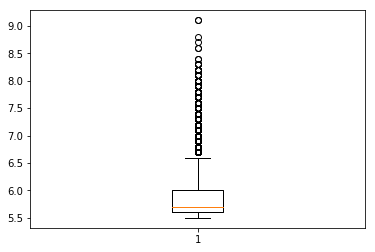

In [20]:
plt.boxplot(earth["Magnitude"])
plt.show()

In [21]:
highly_affected = earth[earth["Magnitude"]>=8]
print(highly_affected.shape)

(40, 6)


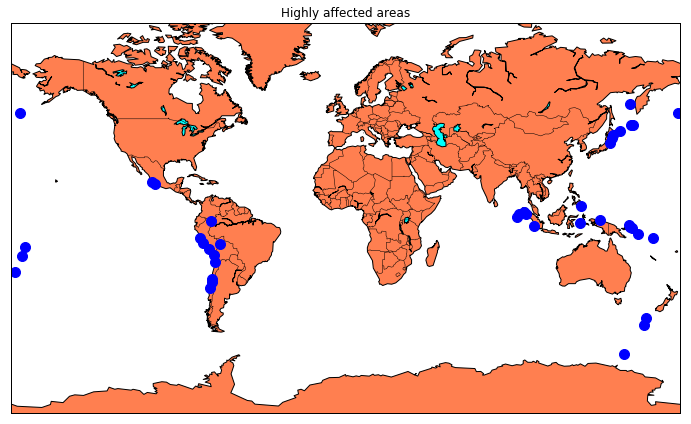

In [22]:
longitudes = highly_affected["Longitude"].tolist()
latitudes = highly_affected["Latitude"].tolist()
n = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
x,y = n(longitudes,latitudes)
fig3 = plt.figure(3,figsize=(12,10))
plt.title("Highly affected areas")
n.plot(x, y, "o", markersize = 10, color = 'blue')
n.drawcoastlines()
n.fillcontinents(color='coral',lake_color='aqua')
n.drawmapboundary()
n.drawcountries()
plt.show()

In [26]:
earth["Month"] = earth["Date"].dt.month
print(earth["Month"].value_counts())

3     2114
8     2014
12    2001
11    1987
9     1985
4     1971
5     1964
10    1952
1     1891
7     1880
2     1829
6     1824
Name: Month, dtype: int64


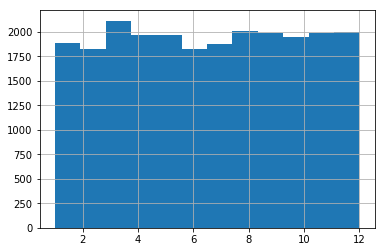

In [29]:
earth['Month'].hist(bins=12)

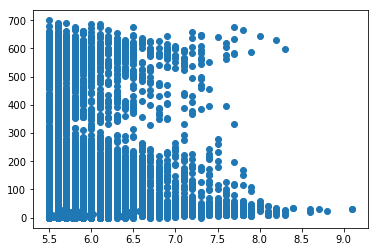

In [30]:
plt.scatter(earth["Magnitude"], earth["Depth"])

In [31]:
np.corrcoef(earth["Magnitude"], earth["Depth"])

array([[ 1.        ,  0.02345731],
       [ 0.02345731,  1.        ]])

# Visualizing earthquackes (1965-2016) Animation

Ref: https://www.kaggle.com/artimous/d/usgs/earthquake-database/visualizing-earthquakes-via-animations

In [32]:

import matplotlib.animation as animation
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')

In [33]:
# plot
t_file['Year'] = t_file['Date'].str[6:]

In [34]:
fig = plt.figure(figsize = (10, 10))
fig.text(.8, .3, 'try animation', ha='right')
cmap = plt.get_cmap('coolwarm')

m = Basemap(projection='mill', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180, lat_ts=20, resolution='c')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='burlywood', lake_color='lightblue', zorder=1)
m.drawmapboundary(fill_color='lightblue')

START_YEAR = 1965
LAST_YEAR = 2016

points = t_file[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude']][t_file['Year']==str(START_YEAR)]

x, y = m(list(points['Longitude']), list(points['Latitude']))
scat = m.scatter(x, y, s=points['Magnitude']*points['Depth']*0.3, marker='o', alpha=0.3, zorder=10, cmap=cmap)
year_text = plt.text(-170, 80, str(START_YEAR), fontsize=15)
plt.title("Earthquake visualisation (1965 - 2016)")
plt.close()

In [38]:
def update(frame_number):
    current_year = START_YEAR + (frame_number % (LAST_YEAR - START_YEAR + 1))
    year_text.set_text(str(current_year))
    points = t_file[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude']][t_file['Year']==str(current_year)]
    x, y = m(list(points['Longitude']), list(points['Latitude']))
    color = points['Depth'] * points['Magnitude']
    scat.set_offsets(np.dstrack((x, y)))
    scat.set_sizes(points['Magnitude'] * points['Depth']*0.3)

In [52]:
ani = animation.FuncAnimation(fig, update, interval=1000, frames=LAST_YEAR - START_YEAR + 1, blit=False)
ani.save('animation.gif', writer='imagemagick', fps=5)

RuntimeError: Error creating movie, return code: 1 Try setting mpl.verbose.set_level("helpful")

In [26]:
import io
import base64

filename = 'animation.gif'

video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

FileNotFoundError: [Errno 2] No such file or directory: 'animation.gif'